# Constitutive Law data generator

To allow inline pictures, run the following block

In [1]:
%matplotlib inline

Import the useful libraries

In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import math
colors = ['red', 'green', 'blue', 'purple', 'slategrey', 'brown', 'darkorange', 'black']

## Parameters of the Constitutive law

In [3]:
# These are the coefficients of the Constitutive law
A = 806
B = 614
C = 0.0089
n = 0.168
m = 1.1
T0 = 20
Tm = 1540
epsp0 = 0.1

Parameters of the curves to generate

In [4]:
num_eps = 70                             # Number of points on the x axis
eps = np.linspace(0, 1, num_eps)         # Strain ranges from 0 to 1
epsp = np.array([0.1, 1, 50, 1000, 500000])   # Strain rate values
temp = np.array([20, 100, 200, 300, 500, 800])     # Temperature values



Definition of the Johnson-Cook constitutive law

In [5]:
def constitutiveLaw(eps, epsp, T, A, B, C, n, m):
    return (A + B * eps**n) * (1 + C * np.log(epsp / epsp0)) * (1 - ((T - T0) / (Tm - T0))**m)

## Main data generation

Generation of Data

In [6]:
Tables = []
for T in temp:
    johnsonCook = eps
    for epspi in epsp:
        sig = constitutiveLaw(eps, epspi, T, A, B, C, n, m)
        johnsonCook = np.vstack((johnsonCook, sig))
    Tables.append(johnsonCook.T)    

Plot the data to see how it looks like

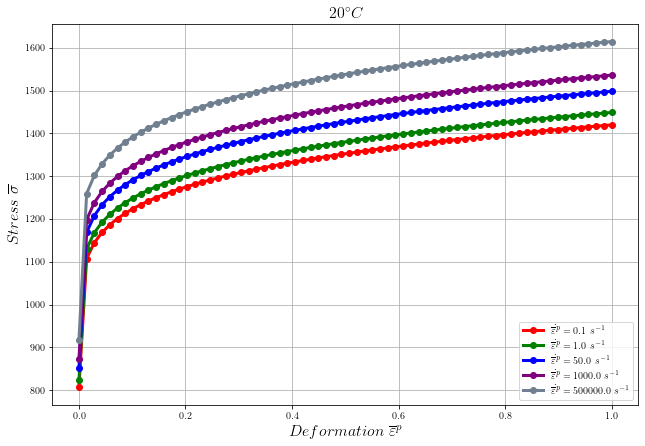

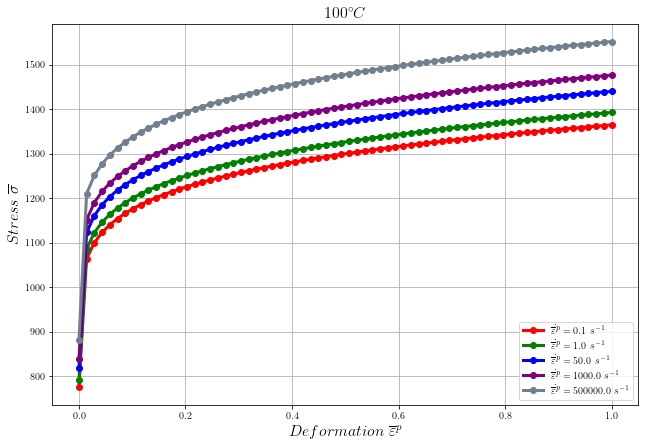

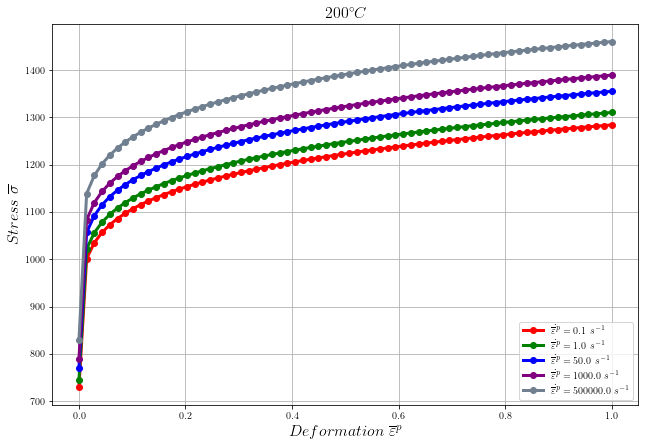

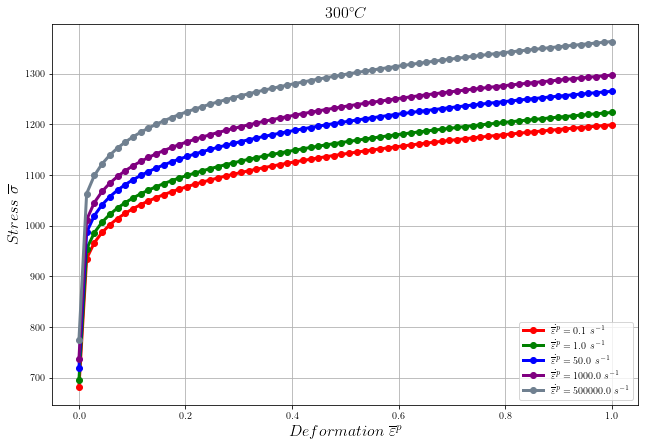

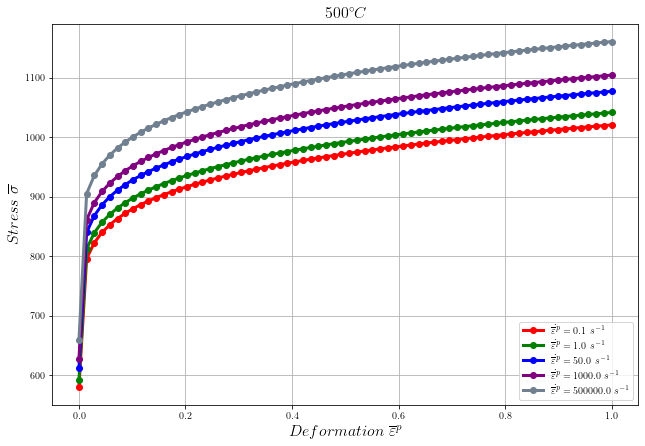

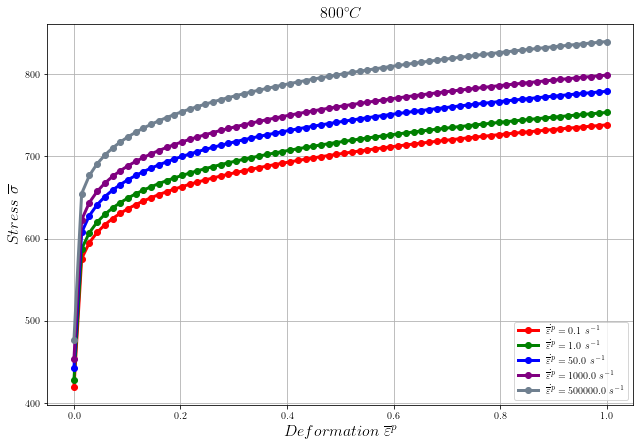

In [7]:
idx = 1
for table in range(len(Tables)):
    plt.figure(figsize = (10.5, 7))
    plt.rc('text', usetex = True)
    johnsonCook = Tables[table]
    # Plot the curves
    for column in range(1, johnsonCook.shape[1]):
        plt.plot(johnsonCook[:,0], johnsonCook[:,column], colors[column-1],
            label=r'$\dot{\overline{\varepsilon}^p}=' + str(epsp[column-1]) + '\ s^{-1}$', marker = 'o',linewidth = 3)
    plt.legend(loc = 'lower right',fancybox = True, numpoints = 1, fontsize = 10)
    plt.grid() # Plot the grid with default size
    plt.xlabel(r'$Deformation\ \overline{\varepsilon}^{p}$', fontsize = 16) # Labels the x axis
    plt.ylabel(r'$Stress\ \overline{\sigma}$', fontsize = 16) # Labels the y axis
    plt.title(r'$' + str(temp[idx-1]) + '^{\circ}C$', fontsize = 16) # Self explicit command
#    plt.savefig('OriginalData'+str(temp[idx-1])+'.svg', bbox_inches = 'tight', pad_inches = 0)
    plt.show()
    idx += 1

Convert Array to Panda Data

In [8]:
data = []
for table in range(len(Tables)):
    # convert your array into a dataframe
    df = pd.DataFrame (Tables[table])

    # Name the columns
    for c in range(len(epsp)):
        df.rename(columns={c+1:epsp[c]}, inplace=True)
    df.rename(columns={0:'epsilon'}, inplace=True)
    data.append(df)

Export data to Excel file

In [9]:
# save to xlsx file
writer = pd.ExcelWriter('JC-Experiments.xlsx', engine='xlsxwriter')
for table in range(len(Tables)):
    data[table].to_excel(writer, index=False, sheet_name= str(temp[table])+'°C')
writer.save()

## Generation of test data

In [10]:
dataPoints = 1000
testData = np.empty((0, 4))

for test in range(dataPoints):
    Eps = np.random.uniform(eps.min()+.05,eps.max())
    Epsp = np.random.uniform(epsp.min(),epsp.max())
    T = np.random.uniform(temp.min(),temp.max())
    sig = constitutiveLaw(Eps, Epsp, T, A, B, C, n, m)
    newrow = np.array([Eps, Epsp, T, sig])
    testData = np.vstack([testData, newrow])
    print(Eps, Epsp, T, sig)

0.9360082888805628 446450.14347427484 569.0025029192126 1081.9645137310506
0.9533467851213396 140325.5434713661 429.30846116110746 1217.0498365919484
0.2547191702367863 215752.26193828855 676.588722502952 881.2655710454043
0.8731762218978762 65631.22703578974 547.2267975121127 1082.7567146532704
0.38579405961690294 195639.39262319452 167.90264467111032 1384.9200535042296
0.9033819501303016 485044.2684951543 66.13200569153196 1568.4449802321908
0.6779895424724459 225951.20913347608 796.5423254969655 815.3351291818225
0.26455587306461276 407420.75512187165 60.42897575374786 1445.5241662071396
0.4029438192834805 347548.94871160836 88.00252776434291 1462.1647980870378
0.8086266044431328 39572.05241785574 91.59088313738376 1504.7985815804468
0.6485758821822268 132107.82385771014 43.503936555929705 1533.8466622619424
0.8603769779782027 82147.44063295564 449.4536035634939 1182.7976719109104
0.3096755636191858 187975.87068723998 663.7064438259936 904.0483569671003
0.16609646422597868 252739.51

0.83233430725226 41455.43170687404 610.0473788929077 1010.8370219063659
0.1408863985304813 396832.4727789944 68.06900068408349 1384.7667198356853
0.12043273071296526 201146.4864783303 593.8959224768096 917.813133142017
0.16799585718178156 478151.4231282417 682.6161405226869 858.452353288556
0.563346514907045 350177.75786197156 398.5243059228773 1211.314080152418
0.23344627910546706 127414.77460034436 672.0945532373947 877.1241075026488
0.08285830642917422 272691.1667579838 736.4473417799557 770.8483786118991
0.8068213762333268 356635.0719469311 777.47363068953 848.811297194115
0.881801899453676 201198.69128798431 592.8932558547956 1045.7377549394332
0.27881900986830055 243924.03366618793 785.6074436471628 779.5956173747578
0.7947639887437465 336729.5020395425 676.3374913998589 954.8745884514232
0.31318796632032836 263388.5627990806 84.32032649642262 1437.9622173861842
0.4504482083603297 32734.432934021268 751.6428470398708 826.0149532301498
0.777451146508954 216913.198527962 86.4619369

0.7229824996510216 191622.83831551296 135.87186073523748 1473.7725301027401
0.7118629491419615 5475.649660534225 433.94315046289404 1156.9284517878891
0.9239544188548617 353904.08068067854 334.4146994456269 1318.4241832921848
0.35569368163834464 356294.451832808 301.5152341781212 1264.990073484209
0.05681419448864222 134061.4543829788 648.769987786169 828.8369552980314
0.10917351126915185 135603.23306228512 577.9854531219503 924.1861569317645
0.08845110190673897 436053.3938574106 252.6929507299138 1204.6918784432928
0.5090106846707385 384096.1104731552 515.2867630336355 1089.2072238135017
0.21234463363205597 466360.4668198068 472.54302896265193 1070.5768211735485
0.9430243297246265 327422.1395639146 545.2964582194558 1104.698836446356
0.9542365325772917 30801.780485353887 248.4055142281778 1378.6349130100368
0.4936017069828664 44186.83447675433 612.8828630210537 972.428242641415
0.20545760532528523 193498.9774865129 34.51080418258592 1432.493473125995
0.8878127529528017 211013.84271426

In [11]:
np.savez("Datatest", testData = testData)